# Final Year Project: Alexander Scott 2022
This notebook is compiled from the files obtained from [Airborne.jl](https://github.com/JuDO-dev/AirBorne.jl/tree/fd7da4066352b7d836fd81ee77342fcde5e10770) on his final commit.


In [1]:
using Pkg
Pkg.activate("/root/project/notebooks/AlexanderScott2022")


  Activating project at `~/project/notebooks/AlexanderScott2022`


In [13]:
# Pkg.add("LinearAlgebra")
# Pkg.add("Statistics")
# Pkg.add("Plots")
# Pkg.add("Random")
# Pkg.add("JuMP")
# Pkg.add("DelimitedFiles")
# Pkg.add("SCS")
# Pkg.add("Convex")
# Pkg.add("ShiftedArrays")
# Pkg.add("Flux")
# Pkg.add("MarketTechnicals")
# Pkg.add("TimeSeries")
# Pkg.add("Dates")
# Pkg.add("DataFrames")
# Pkg.add("StatsBase")
# Pkg.add("StatsPlots")
# Pkg.add("Distributions")
# Pkg.add("MathOptInterface")
# Pkg.add("Pkg")
# Pkg.add("PyCall")
Pkg.add("PyPlot")
# Pkg.add("Conda")
# Pkg.add("Pandas")
# Pkg.add("SciPy")
# Pkg.add("KernelDensity")
# Pkg.add("GLM")
# Pkg.add("MLBase")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed PyPlot ─ v2.11.1
    Updating `~/project/notebooks/AlexanderScott2022/Project.toml`
  [d330b81b] + PyPlot v2.11.1
    Updating `~/project/notebooks/AlexanderScott2022/Manifest.toml`
  [d330b81b] + PyPlot v2.11.1
Precompiling project...
  ✓ PyPlot
  1 dependency successfully precompiled in 9 seconds. 282 already precompiled.


In [10]:
# ENV["PYTHON"]="/usr/local/bin/python"
ENV["PYTHON"]
# using 
pyimport_conda("yfinance", "yfinance")
# using Conda
# Conda.add("yfinance")

Solving environment: ...working... done

## Package Plan ##

  environment location: /root/.julia/conda/3/x86_64

  added / updated specs:
    - yfinance


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    appdirs-1.4.4              |     pyh9f0ad1d_0          13 KB  conda-forge
    beautifulsoup4-4.12.2      |     pyha770c72_0         112 KB  conda-forge
    frozendict-2.3.8           |  py310h2372a71_0          46 KB  conda-forge
    html5lib-1.1               |     pyh9f0ad1d_0          89 KB  conda-forge
    icu-72.1                   |       hcb278e6_0        11.4 MB  conda-forge
    libiconv-1.17              |       h166bdaf_0         1.4 MB  conda-forge
    libxml2-2.10.4             |       hfdac1af_0         697 KB  conda-forge
    libxslt-1.1.37             |       h873f0b0_0         251 KB  conda-forge
    lxml-4.9.2                 |  py310hbdc0903_0         1.3 MB  conda-forg

[ Info: Installing yfinance via the Conda yfinance package...
[ Info: Running `conda install -y yfinance` in root environment


PyObject <module 'yfinance' from '/root/.julia/conda/3/x86_64/lib/python3.10/site-packages/yfinance/__init__.py'>

In [20]:
# this is a test script to run the code to show what functions the user would have access to 
# and what they would be able to do
include("Data.jl") 
include("Behavioural.jl") 
include("Errors.jl")
include("Buy_sell.jl")
include("Plotting.jl")

plot_histogram (generic function with 1 method)

### First Set of Experiments

In [26]:
folder = "/root/project/notebooks/AlexanderScott2022/Results/Simple Vs Machine/"
all_data = get_data("AAPL", "2016-07-11", "2021-07-10", "", "1d")
adj_close = all_data[:, 6]
adj_close_norm = normalize(adj_close)
train, test = split_train_test(adj_close_norm)

[*********************100%***********************]  1 of 1 completed

Row,Date,Open,High,Low,Close,Adj Close,Volume
,DateTime,Float64,Float64,Float64,Float64,Float64,Int64
1,2016-07-11T00:00:00,24.1875,24.4125,24.1825,24.245,22.387,95179600
2,2016-07-12T00:00:00,24.2925,24.425,24.28,24.355,22.4885,96670000
3,2016-07-13T00:00:00,24.3525,24.4175,24.21,24.2175,22.3616,103568800
4,2016-07-14T00:00:00,24.3475,24.7475,24.33,24.6975,22.8048,155676000
5,2016-07-15T00:00:00,24.73,24.825,24.625,24.695,22.8025,120548000
6,2016-07-18T00:00:00,24.675,25.0325,24.65,24.9575,23.0449,145975600
7,2016-07-19T00:00:00,24.89,25.0,24.835,24.9675,23.0541,95119600
8,2016-07-20T00:00:00,25.0,25.115,24.935,24.99,23.0749,105104000
9,2016-07-21T00:00:00,24.9575,25.25,24.7825,24.8575,22.9525,130808000


([0.000590880043697406; 0.001429482451130425; … ; 0.3326614960043312; 0.3328825720718532;;], [0.3388509959588656; 0.3402826516894744; … ; 0.984739042521725; 1.0;;])

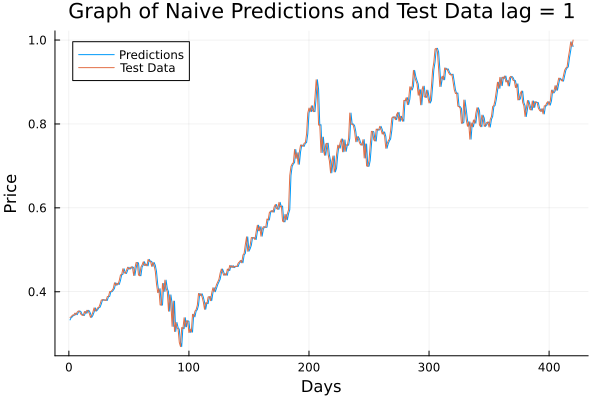

0.00037218321786492553


In [27]:
# Naive ------------------------------------------------------------------------------
lag = 1
naive_predictions = naive(adj_close_norm, lag)
pred_train, pred_test = split_train_test(naive_predictions)
plot_comparison(pred_test, test, "Predictions", "Test Data", "Graph of Naive Predictions and Test Data lag = $lag", "Days", "Price")
Plots.savefig(string(folder, "lag_app_$lag"))
mse = Flux.mse(pred_test, test)
println(mse)

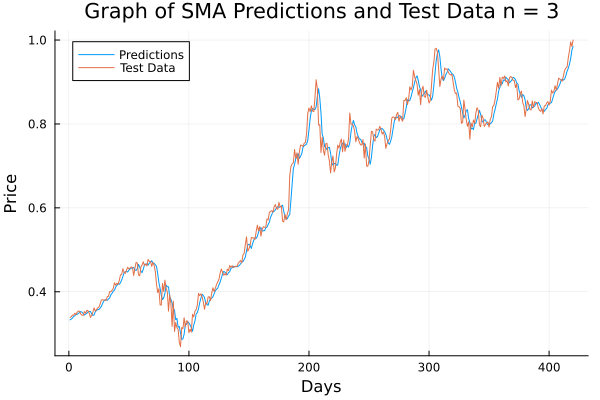

0.0005056434894370183


In [28]:
# SMA --------------------------------------------------------------------------------
n = 3
sma_predictions = sma(adj_close_norm, n)
sma_predictions = remove_last_i_vals(sma_predictions, 1)
pred_train, pred_test = split_train_test(sma_predictions)
plot_comparison(pred_test, test, "Predictions", "Test Data", "Graph of SMA Predictions and Test Data n = $n", "Days", "Price")
Plots.savefig(string(folder, "sma_app_$n"))
mse = Flux.mse(pred_test, test)
println(mse)

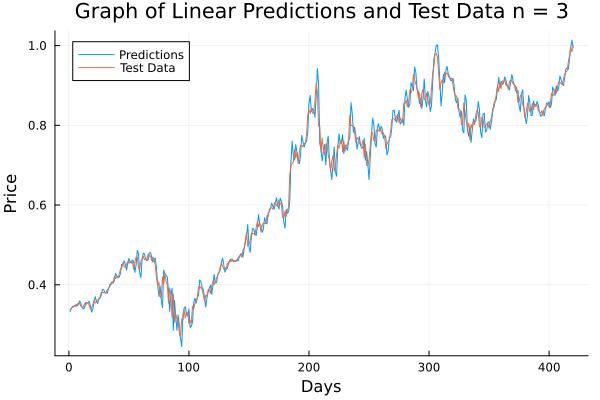

0.0005592628729753719


In [29]:
# LIN -------------------------------------------------------------------------------
n = 3
lin_predictions = linear_prediction(adj_close_norm, n, 1)
linear_predictions = remove_last_i_vals(lin_predictions, 1)
pred_train, pred_test = split_train_test(linear_predictions)
plot_comparison(pred_test, test, "Predictions", "Test Data", "Graph of Linear Predictions and Test Data n = $n", "Days", "Price")
Plots.savefig(string(folder, "lin_app_$n"))
mse = Flux.mse(pred_test, test)
println(mse)


### Second Set of Experiments

In [30]:
# Simple vs Behavioural
all_data = get_data("AMZN", "2018-01-01", "2021-01-01", "", "1d")
adj_close = all_data[:, 6]

# Previous price values only 
depths = [10, 20]
gamma = [0.1, 0.7]
num_preds = 1
folder = "/root/project/notebooks/AlexanderScott2022/Results/Simple Vs Behavioural"

adj_close_train , adj_close_test = split_train_test(adj_close)
adj_close_standard = standardize(adj_close, adj_close_train)
train_standard, test_standard = split_train_test(adj_close_standard)

[*********************100%***********************]  1 of 1 completed

Row,Date,Open,High,Low,Close,Adj Close,Volume
,DateTime,Float64,Float64,Float64,Float64,Float64,Int64
1,2018-01-02T00:00:00,58.6,59.5,58.5255,59.4505,59.4505,53890000
2,2018-01-03T00:00:00,59.415,60.2745,59.415,60.21,60.21,62176000
3,2018-01-04T00:00:00,60.25,60.7935,60.233,60.4795,60.4795,60442000
4,2018-01-05T00:00:00,60.8755,61.457,60.5,61.457,61.457,70894000
5,2018-01-08T00:00:00,61.8,62.654,61.6015,62.3435,62.3435,85590000
6,2018-01-09T00:00:00,62.845,62.9665,62.088,62.635,62.635,73226000
7,2018-01-10T00:00:00,62.2575,62.7165,61.8615,62.7165,62.7165,53720000
8,2018-01-11T00:00:00,62.987,63.8385,62.823,63.834,63.834,62500000
9,2018-01-12T00:00:00,63.6695,65.288,63.6695,65.26,65.26,108874000


([-3.0440563008080543; -2.956308720047343; … ; 0.7617923911041514; 1.0516082412747934;;], [0.9185135245326506; 1.0797406362517277; … ; 9.068713216480688; 8.901651779584512;;])

In [40]:
# The behavioural_prediction function takes really long to run
# This is because tere is a loop on test_data ( of length 252) where each iteration takes approximately
# i=1;j=1;     
# L = depths[i]
# γ = gamma[j]
# println(size(adj_close_standard))
# println(size(train_standard))
println(size(test_standard))
# println(num_preds)

(252, 1)


(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(

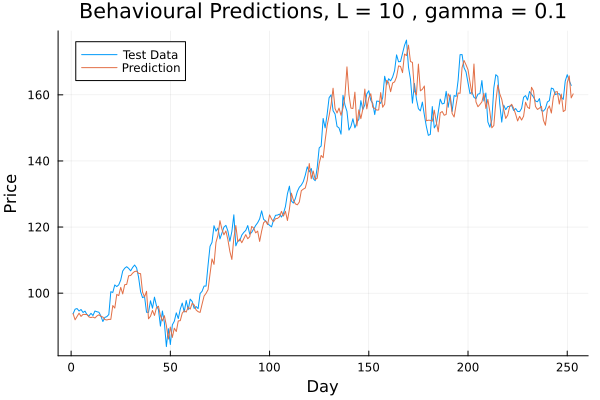

L = 10 γ = 0.1MSE error is 18.684073875166227MAE error is 3.382980188634824Est error is 6.3795263460716445
(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(1

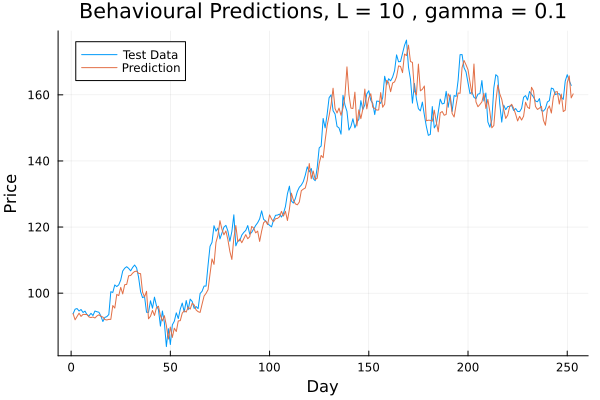

L = 10 γ = 0.1MSE error is 18.684073875166227MAE error is 3.382980188634824Est error is 6.3795263460716445
(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(1

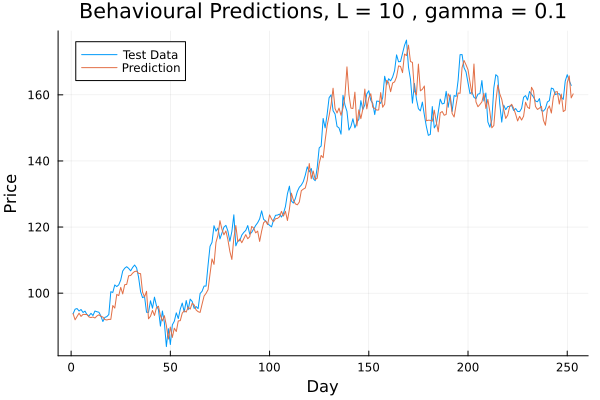

L = 10 γ = 0.1MSE error is 18.684073875166227MAE error is 3.382980188634824Est error is 6.3795263460716445
(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)Failure:interrupted
Failure:interrupted


┌ Warning: Problem status INTERRUPTED; solution may be inaccurate.
└ @ Convex ~/.julia/packages/Convex/tSTAW/src/solution.jl:342
┌ Warning: Problem status INTERRUPTED; solution may be inaccurate.
└ @ Convex ~/.julia/packages/Convex/tSTAW/src/solution.jl:342


LoadError: InterruptException:

In [42]:
for i = 1:size(depths, 1)
    for j = 1:size(gamma, 1)
    predictions = behavioural_prediction(adj_close_standard, train_standard, test_standard, L, num_preds, γ)
    pred_rescaled = rescale(predictions, adj_close_train)
    plot_behavioural_data(adj_close_test, pred_rescaled, L, γ)
    mse, mae, est = estimate_errors(pred_rescaled, adj_close_test)
    println("L = $L γ = $γ", "MSE error is $mse", "MAE error is $mae", "Est error is $est")
    end
end

In [43]:
# plot graphs of error vs depth and error vs gamma
ms_vals, ma_vals, est_vals = get_error_vs_depth(adj_close_standard, train_standard, adj_close_train, test_standard, num_preds, 10, 20, 0.1)
ms_vals2, ma_vals2, estvals2 , gamma_vals = get_error_vs_gamma(adj_close_standard, train_standard, adj_close_train, test_standard, 10, 1)
plot_error_vs_depth(ms_vals, 10, 20, "MSE", 0.1)
plot_error_vs_gamma(ms_vals2, gamma_vals, 10, "MSE")

(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)(10, 486)Failure:interrupted


┌ Warning: Problem status INTERRUPTED; solution may be inaccurate.
└ @ Convex ~/.julia/packages/Convex/tSTAW/src/solution.jl:342


LoadError: InterruptException:

#### Perform same tests on same data with the Simple methods to get graphs and values

In [ ]:
# Naive ------------------------------------------------------------------------------
lag = 1
naive_predictions = naive(adj_close, lag)
pred_train, pred_test = split_train_test(naive_predictions)
plot_comparison(pred_test, adj_close_test, "Predictions", "Test Data", "Graph of Naive Predictions and Test Data lag = $lag", "Days", "Price")
Plots.savefig(string(folder, "lag_app_$lag"))
mse = Flux.mse(pred_test, adj_close_test)
mae = Flux.mae(pred_test, adj_close_test)
println("MSE for Naive is $mse ", "MAE for Naive is $mae ")

In [ ]:
# SMA --------------------------------------------------------------------------------
n = 3
sma_predictions = sma(adj_close, n)
sma_predictions = remove_last_i_vals(sma_predictions, 1)
pred_train, pred_test = split_train_test(sma_predictions)
plot_comparison(pred_test, adj_close_test, "Predictions", "Test Data", "Graph of SMA Predictions and Test Data n = $n", "Days", "Price")
Plots.savefig(string(folder, "sma_app_$n"))
mse = Flux.mse(pred_test, adj_close_test)
mae = Flux.mae(pred_test, adj_close_test)
println("MSE for SMA is $mse ", "MAE for SMA is $mae ")


In [ ]:
# LIN -------------------------------------------------------------------------------
n = 3
lin_predictions = linear_prediction(adj_close, n, 1)
linear_predictions = remove_last_i_vals(lin_predictions, 1)
pred_train, pred_test = split_train_test(linear_predictions)
plot_comparison(pred_test, adj_close_test, "Predictions", "Test Data", "Graph of Linear Predictions and Test Data n = $n", "Days", "Price")
Plots.savefig(string(folder, "lin_app_$n"))
mse = Flux.mse(pred_test, adj_close_test)
mae = Flux.mae(pred_test, adj_close_test)
println("MSE for SMA is $mse ", "MAE for SMA is $mae ")

### Third set of experiments

In [ ]:
# Using Previous Price AND Volume Data ------------------------------------------------------------------------------

all_data = get_data("AMZN", "2018-01-01", "2021-01-01", "", "1d")
adj_close = all_data[:, 6]
vol = all_data[:, 7]

vol_train, vol_test = split_train_test(vol)
adj_close_train , adj_close_test = split_train_test(adj_close)

adj_close_standard = standardize(adj_close, adj_close_train)
vol_standard = standardize(vol, vol_train)

data_standard = [adj_close_standard vol_standard]
train_standard, test_standard = split_train_test(data_standard)

for i = 1:size(depths, 1)
    for j = 1:size(gamma, 1)
        L = depths[i]
        γ = gamma[j]
        predictions = behavioural_prediction(data_standard, train_standard, test_standard, L, num_preds, γ)
        pred_rescaled = rescale(predictions, adj_close_train)
        plot_behavioural_data(adj_close_test, pred_rescaled, L, γ)
        # Plots.savefig(string(folder, "Price_vol","depth_$L", "_gamma_$j"))
        mse, mae, est = estimate_errors(pred_rescaled, adj_close_test)
        println("L = $L γ = $γ", "MSE error is $mse", "MAE error is $mae", "Est error is $est")
    end
end

# Buy Sell Test using Historical Price and volume Data -----------------------------------------------------------------------------
# L = 10 : γ =  0.1 This was the best value tested before
L = 10
γ = 0.1
num_preds = 1

### Fourth set of experiments

In [ ]:

all_data = get_data("AMZN", "2018-01-01", "2021-01-01", "", "1d")
adj_close = all_data[:, 6]
vol = all_data[:, 7]

vol_train, vol_test = split_train_test(vol)
adj_close_train , adj_close_test = split_train_test(adj_close)

adj_close_standard = standardize(adj_close, adj_close_train)
vol_standard = standardize(vol, vol_train)

data_standard = [adj_close_standard vol_standard]
train_standard, test_standard = split_train_test(data_standard)

# do predictions for all
predictions = behavioural_prediction(data_standard, train_standard, test_standard, L, num_preds, γ)
pred_rescaled = rescale(predictions, adj_close_train)
# split adj close test values in half 
adj_close_test_1 = adj_close_test[1:floor(Int, size(adj_close_test, 1)/2)]
adj_close_test_2 = adj_close_test[floor(Int, size(adj_close_test, 1)/2)+1:size(adj_close_test, 1)]

# split predictions in half 
clean = collect(skipmissing(pred_rescaled))
pred_rescaled_1 = clean[1:floor(Int, size(clean, 1)/2)]
pred_rescaled_2 = clean[floor(Int, size(clean, 1)/2)+1:size(clean, 1)]

# calculate errors for all predictions and get the get the confidence interval
abs_matx, rel_matx, perc_matx= get_error_matrix(pred_rescaled, adj_close_test, adj_close_train)

# get first half of error matrix 
rel_matx_1 = rel_matx[1:floor(Int, size(adj_close_test, 1)/2)]
normal, x, pdf, kde = est_distribution(rel_matx_1, 30)
lower, upper = get_confidence_int(normal, 0.9)
plot_histogram(rel_matx_1, normal, x, pdf, kde, lower, upper, "Relative", 30)

# Then do the Buy sell strategy
holding = Holding(0, 0, 10000)
holding, value, curr_price = buy_sell_hold(holding, upper, lower, 0.0, 0.0, pred_rescaled_2, adj_close_test_1, adj_close_test_2, 0.001)
println(holding)
println(value)

In [ ]:

SMA ---------------------------------------------------------------------

adj_close_train , adj_close_test = split_train_test(adj_close)

# split adj close
adj_close_test_1 = adj_close_test[1:floor(Int, size(adj_close_test, 1)/2)]
adj_close_test_2 = adj_close_test[floor(Int, size(adj_close_test, 1)/2)+1:size(adj_close_test, 1)]

n = 3
sma_predictions = sma(adj_close, n)
sma_predictions = remove_last_i_vals(sma_predictions, 1)
pred_train, pred_test = split_train_test(sma_predictions)

pred_test_2 = pred_test[floor(Int, size(pred_test, 1)/2)+1: size(pred_test,1)]

abs_matx, rel_matx, perc_matx= get_error_matrix(pred_test, adj_close_test, adj_close_train)

rel_matx_1 = rel_matx[1:floor(Int, size(adj_close_test, 1)/2)]

normal, x, pdf, kde = est_distribution(rel_matx_1, 30)
lower, upper = get_confidence_int(normal, 0.9)
plot_histogram(rel_matx_1, normal, x, pdf, kde, lower, upper, "Perc", 30)

holding = Holding(0, 0, 10000)
holding, value, curr_price = buy_sell_hold(holding, upper, lower, 0.0, 0.0, pred_test_2, adj_close_test_1, adj_close_test_2, 0.001)
println(holding)
println(value)

In [ ]:
# Linear -----------------------------------------------------------------------------
n = 3
lin_predictions = linear_prediction(adj_close, n, 7)
linear_predictions = remove_last_i_vals(lin_predictions, 1)
pred_train, pred_test = split_train_test(linear_predictions)

pred_test_2 = pred_test[floor(Int, size(pred_test, 1)/2)+1: size(pred_test,1)]

abs_matx, rel_matx, perc_matx = get_error_matrix(pred_test, adj_close_test, adj_close_train)

rel_matx_1 = rel_matx[1:floor(Int, size(adj_close_test, 1)/2)]

normal, x, pdf, kde = est_distribution(rel_matx_1, 30)
lower, upper = get_confidence_int(normal, 0.9)
plot_histogram(rel_matx_1, normal, x, pdf, kde, lower, upper, "Perc", 30)

holding = Holding(0, 0, 10000)
holding, value, curr_price = buy_sell_hold(holding, upper, lower, 0.0, 0.0, pred_test_2, adj_close_test_1, adj_close_test_2, 0.001)
println(holding)
println(value)

### Fifth set of experiments

In [ ]:
# Buy/Sell 7 days ahead --------------------------------------------------------------------------------------------------

all_data = get_data("AMZN", "2018-01-01", "2021-01-01", "", "1d")
adj_close = all_data[:, 6]
vol = all_data[:, 7]

# L = 10 : γ =  0.1 This was the best value tested before
L = 10
γ = 0.1
num_preds = 7

vol_train, vol_test = split_train_test(vol)
adj_close_train , adj_close_test = split_train_test(adj_close)

adj_close_standard = standardize(adj_close, adj_close_train)
vol_standard = standardize(vol, vol_train)

data_standard = [adj_close_standard vol_standard]
train_standard, test_standard = split_train_test(data_standard)

# do predictions for all
predictions = behavioural_prediction(data_standard, train_standard, test_standard, L, num_preds, γ)
pred_rescaled = rescale(predictions, adj_close_train)
# split adj close test values in half 
adj_close_test_1 = adj_close_test[1:floor(Int, size(adj_close_test, 1)/2)]
adj_close_test_2 = adj_close_test[floor(Int, size(adj_close_test, 1)/2)+1:size(adj_close_test, 1)]

# split predictions in half and select only 7 day ahead predictions
clean = collect(skipmissing(pred_rescaled[:, 7]))
pred_rescaled_1 = clean[1:floor(Int, size(clean, 1)/2)]
pred_rescaled_2 = clean[floor(Int, size(clean, 1)/2)+1:size(clean, 1)]

# calculate errors for all predictions and get the get the confidence interval
abs_matx, rel_matx, perc_matx= get_error_matrix(pred_rescaled, adj_close_test, adj_close_train)

# get first half of error matrix and select only 7 day ahead predictions
rel_matx_1 = rel_matx[1:floor(Int, size(adj_close_test, 1)/2), num_preds]
normal, x, pdf, kde = est_distribution(rel_matx_1, 30)
lower, upper = get_confidence_int(normal, 0.9)
plot_histogram(rel_matx_1, normal, x, pdf, kde, lower, upper, "Relative", 30)

# Then do the Buy sell strategy
holding = Holding(0, 0, 10000)
holding, value, curr_price = buy_sell_hold(holding, upper, lower, 0.0, 0.0, pred_rescaled_2, adj_close_test_1, adj_close_test_2, 0.001)
println(holding)
println(value)


In [ ]:
# SMA ----------------------------------------------------------------------------------------------------------
# Buy_sell test would be the same as the prediction 1 day ahead as an avg of last 3 days 
# would be the same as prediction 7 days ahead as an avg of last 3 days.

In [ ]:
# Linear --------------------------------------------------------------------------------------------------------

n = 3
lin_predictions = linear_prediction(adj_close, n, 7)
linear_predictions = remove_last_i_vals(lin_predictions, 1)
pred_train, pred_test = split_train_test(linear_predictions)

pred_test_2 = pred_test[floor(Int, size(pred_test, 1)/2)+1: size(pred_test,1)]

abs_matx, rel_matx, perc_matx = get_error_matrix(pred_test, adj_close_test, adj_close_train)

rel_matx_1 = rel_matx[1:floor(Int, size(adj_close_test, 1)/2)]

normal, x, pdf, kde = est_distribution(rel_matx_1, 30)
lower, upper = get_confidence_int(normal, 0.9)
plot_histogram(rel_matx_1, normal, x, pdf, kde, lower, upper, "Perc", 30)

holding = Holding(0, 0, 10000)
holding, value, curr_price = buy_sell_hold(holding, upper, lower, 0.0, 0.0, pred_test_2, adj_close_test_1, adj_close_test_2, 0.001)
println(holding)
println(value)


